In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets list

ref                                                                  title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                    Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000          13458        238  1.0              
adilshamim8/student-depression-dataset                               Student Depression Dataset                             467020  2025-03-13 03:12:30.423000           5355         87  1.0              
abdulmalik1518/mobiles-dataset-2025                                  Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          18648        307

In [5]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!ls

dogs-vs-cats.zip  image_resized  sampleSubmission.csv  test1.zip     train	x
drive		  sample_data	 test1		       test_resized  train.zip


In [7]:
from zipfile import ZipFile
dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
train = "/content/train.zip"

with ZipFile(train, 'r') as zip:
  zip.extractall()
  print('done')

done


In [9]:
test = "/content/test1.zip"

with ZipFile(test, 'r') as zip:
  zip.extractall()
  print('done')

done


In [10]:
import os

path , dirs , files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [11]:
file_names = os.listdir("/content/train")
print(file_names[:10])

['dog.6020.jpg', 'dog.10782.jpg', 'cat.7539.jpg', 'dog.9013.jpg', 'dog.5439.jpg', 'dog.1058.jpg', 'dog.4068.jpg', 'dog.12498.jpg', 'dog.1385.jpg', 'dog.2874.jpg']


In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

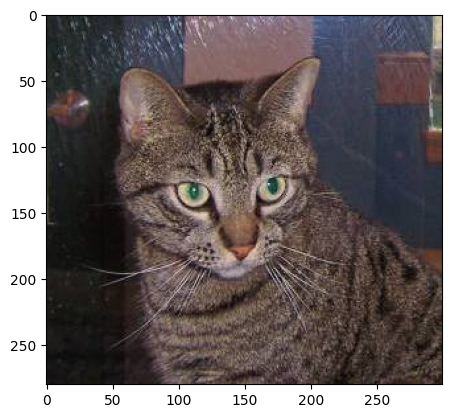

In [13]:
img = mpimg.imread('/content/train/cat.1.jpg')
imgplot = plt.imshow(img)
plt.show()

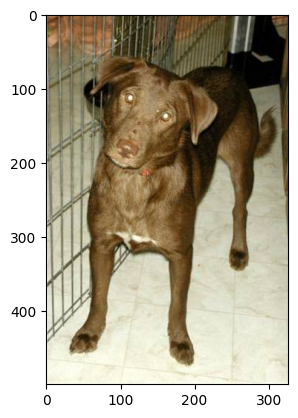

In [14]:
img = mpimg.imread('/content/train/dog.1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
file_names = os.listdir("/content/train")

dog_count = 0
cat_count = 0
for img_file in file_names:

  name = img_file[0:3]
  if name == "cat":
    cat_count+= 1
  elif name == "dog":
    dog_count += 1

print("Dogs: ", dog_count)
print("Cats: ", cat_count)

Dogs:  12500
Cats:  12500


In [17]:
if os.path.isdir('/content/image_resized'):
    print("This folder is avaliable")
else:
    os.mkdir("/content/image_resized")

This folder is avaliable


In [18]:
original_folder = "/content/train/"
resized_folder = "/content/image_resized/"

for i in range(2000):

  file_name  = os.listdir(original_folder)[i]
  img_path = original_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")
  img.save(resized_folder + file_name)

In [19]:
file_names = os.listdir('/content/image_resized')
print(file_names)

['dog.6020.jpg', 'dog.10782.jpg', 'cat.7539.jpg', 'dog.9013.jpg', 'dog.5439.jpg', 'dog.1058.jpg', 'dog.4068.jpg', 'dog.12498.jpg', 'dog.1385.jpg', 'dog.2874.jpg', 'dog.11733.jpg', 'dog.8157.jpg', 'cat.4612.jpg', 'cat.10396.jpg', 'dog.1320.jpg', 'cat.1755.jpg', 'cat.8098.jpg', 'dog.18.jpg', 'cat.7462.jpg', 'cat.7034.jpg', 'cat.1571.jpg', 'dog.2995.jpg', 'dog.4076.jpg', 'cat.10488.jpg', 'dog.3489.jpg', 'dog.446.jpg', 'cat.9450.jpg', 'cat.10198.jpg', 'dog.11468.jpg', 'cat.5605.jpg', 'dog.2154.jpg', 'dog.1461.jpg', 'dog.3781.jpg', 'dog.132.jpg', 'dog.4414.jpg', 'dog.9208.jpg', 'cat.1698.jpg', 'dog.5333.jpg', 'cat.4067.jpg', 'cat.9213.jpg', 'dog.11729.jpg', 'cat.647.jpg', 'cat.8310.jpg', 'cat.8034.jpg', 'cat.10999.jpg', 'dog.2033.jpg', 'dog.4165.jpg', 'cat.8570.jpg', 'cat.9981.jpg', 'cat.3284.jpg', 'dog.6098.jpg', 'dog.11017.jpg', 'cat.1286.jpg', 'dog.7415.jpg', 'dog.10794.jpg', 'cat.9672.jpg', 'dog.7878.jpg', 'cat.5210.jpg', 'cat.1090.jpg', 'dog.4198.jpg', 'dog.5897.jpg', 'dog.459.jpg', 'd

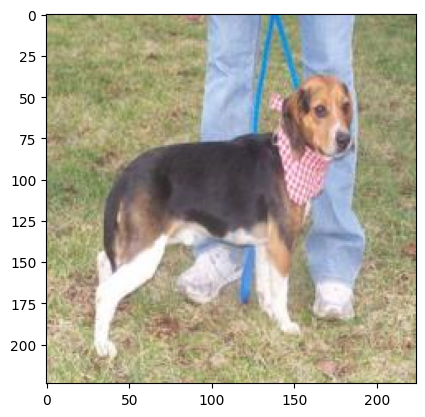

In [20]:
img = mpimg.imread('/content/image_resized/dog.1058.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
labels = []

for i in range(2000):
  file_name = os.listdir("/content/image_resized")[i]
  name = file_name[0:3]
  if name == "cat":
    labels.append(0)
  elif name == "dog":
    labels.append(1)

In [22]:
labels[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [23]:
values , counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1029  971]


In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/image_resized'
image_extension = ['png' , 'jpg']

files = []

[files.extend(glob.glob(image_directory + '/*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [26]:
print(dog_cat_images)

[[[[ 65  98  77]
   [ 65  98  77]
   [ 75 103  84]
   ...
   [ 38  90 102]
   [ 31  78  92]
   [ 37  83 100]]

  [[ 75 108  87]
   [ 71 102  81]
   [ 70  98  79]
   ...
   [ 51 103 115]
   [ 51  97 114]
   [ 42  88 105]]

  [[ 68  99  78]
   [ 69 100  79]
   [ 71  99  80]
   ...
   [ 59 111 124]
   [ 65 111 129]
   [ 42  88 106]]

  ...

  [[ 10  71  67]
   [ 55 115 114]
   [ 79 137 136]
   ...
   [ 82 135 156]
   [ 32  82 102]
   [  3  53  73]]

  [[ 67 132 133]
   [ 46 110 111]
   [ 17  78  82]
   ...
   [ 63 116 137]
   [ 43  93 113]
   [ 27  77  97]]

  [[ 43 110 113]
   [ 23  90  93]
   [ 47 109 117]
   ...
   [129 182 203]
   [127 176 198]
   [ 94 144 164]]]


 [[[ 96 114 143]
   [150 169 196]
   [176 190 218]
   ...
   [ 56  65  55]
   [ 60  64  52]
   [ 73  76  61]]

  [[107 125 154]
   [134 153 180]
   [154 171 198]
   ...
   [ 76  81  72]
   [ 70  72  60]
   [ 75  75  61]]

  [[107 125 154]
   [126 145 172]
   [143 160 187]
   ...
   [118 117 107]
   [105 102  88]
   [103  98

In [27]:
type(dog_cat_images)

numpy.ndarray

In [28]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [29]:
X= dog_cat_images
y = np.asarray(labels)

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [34]:
!pip install --upgrade tensorflow tensorflow-hub

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)


In [35]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Flatten, Dropout, Lambda, InputLayer
from tensorflow.keras.models import Sequential

In [36]:
mobilenet_v2_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenet_v2_layer = hub.KerasLayer(mobilenet_v2_url, input_shape=(224, 224, 3), trainable=False)

In [37]:
num_of_classes = 2
IMAGE_SHAPE = (224, 224)

model = Sequential([
    InputLayer(input_shape=IMAGE_SHAPE + (3,)),  # Giriş katmanı ekledik
    Lambda(lambda x: mobilenet_v2_layer(x)),  # MobileNetV2 katmanı
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Çıkış katmanı (2 sınıf)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,898 (2.51 MB)

 Trainable params: 656,898 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 655ms/step - accuracy: 0.8618 - loss: 0.3834
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 684ms/step - accuracy: 0.9740 - loss: 0.0605
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 669ms/step - accuracy: 0.9864 - loss: 0.0443
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 691ms/step - accuracy: 0.9943 - loss: 0.0181
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 664ms/step - accuracy: 0.9867 - loss: 0.0463


In [40]:
score , acc = model.evaluate(X_test_scaled, y_test)
print("Test Loss: ", score)
print("Test Accuracy: ", acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 683ms/step - accuracy: 0.9802 - loss: 0.1150
Test Loss:  0.08065063506364822
Test Accuracy:  0.9825000166893005


Enter the path of the image: /content/drive/MyDrive/deeplearning/iStock-1052880600.jpg


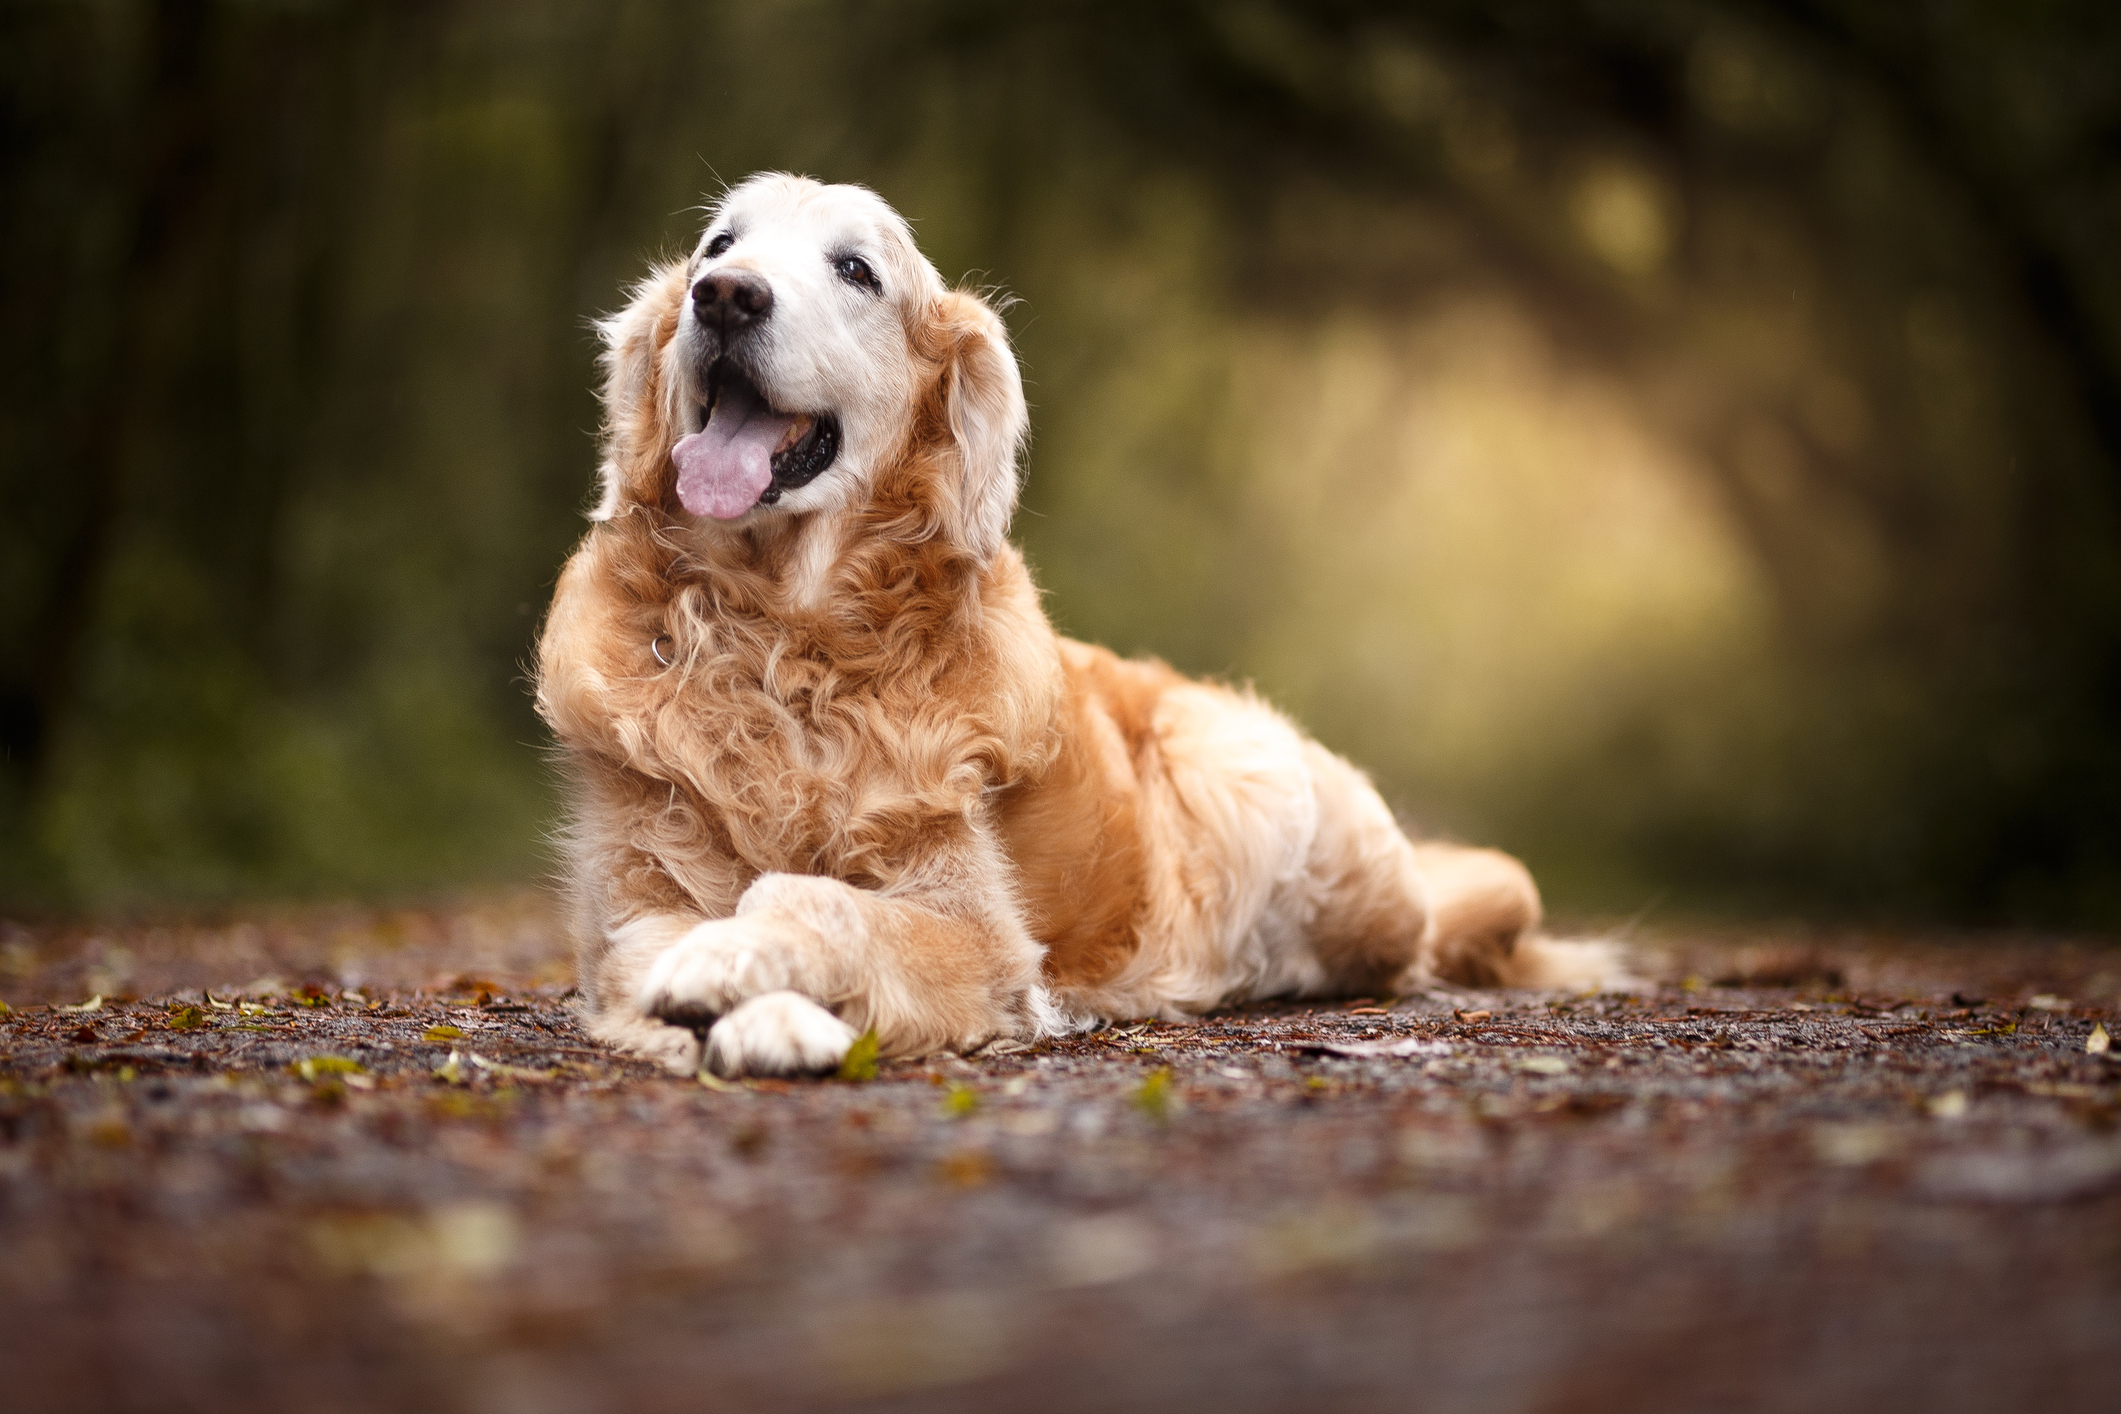

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
Predicted Class: Dog


In [41]:
input_image_path = input("Enter the path of the image: ")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized / 255.0

input_image_reshaped = input_image_scaled.reshape(1, 224, 224, 3)

input_prediction = model.predict(input_image_reshaped)

predicted_class = np.argmax(input_prediction)

if predicted_class == 0:
    print("Predicted Class: Cat")
elif predicted_class == 1:
    print("Predicted Class: Dog")